In [8]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import array

In [9]:
song = AudioSegment.from_wav("audio_2.wav")

In [29]:
samples = np.array(song.get_array_of_samples())
y_f = np.fft.fft(samples)

#Aplicamos filtro paso bajo 
fs = len(samples)
fc = 10000  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b,a = signal.butter(1,w, btype="low")
sample_filtered_low = signal.filtfilt(b, a, samples)
y_ff_low = np.fft.fft(sample_filtered_low)
sample_filtered_array = array.array(song.array_type, sample_filtered_low.astype(int))
song_filtered = song._spawn(sample_filtered_array)
export = song_filtered.export("audio_2_low.wav", format="wav")

#Aplicamos filtro paso alto 
fs = len(samples)
fc = 100000  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b,a = signal.butter(1,w, btype="high")
sample_filtered_high = signal.filtfilt(b, a, samples)
y_ff_high = np.fft.fft(sample_filtered_high)
sample_filtered_array = array.array(song.array_type, sample_filtered_high.astype(int))
song_filtered = song._spawn(sample_filtered_array)
export = song_filtered.export("audio_2_high.wav", format="wav")

C:\Users\gonza\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


C:\Users\gonza\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


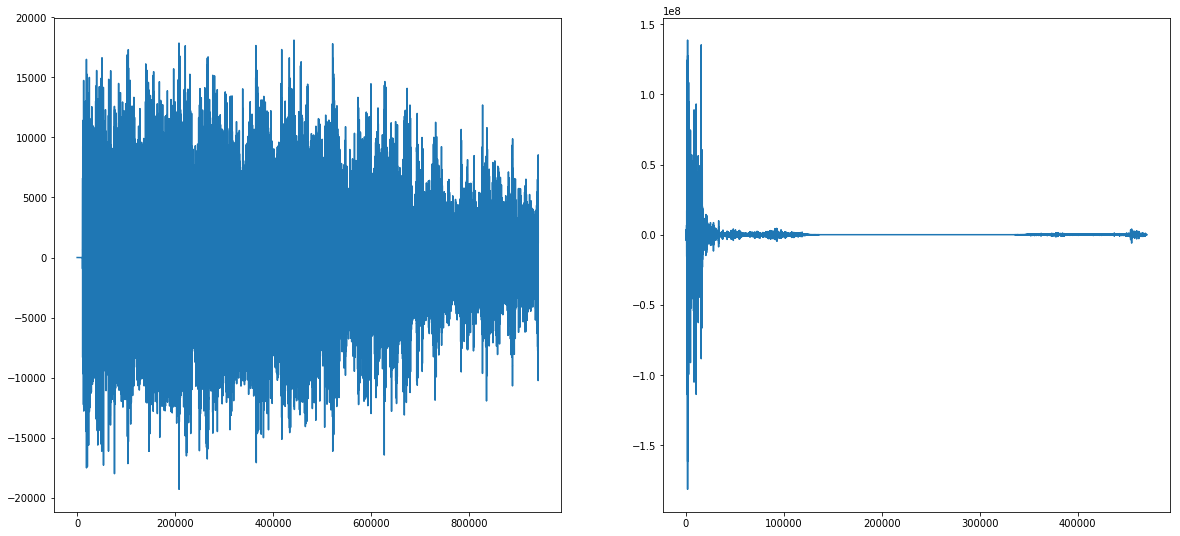

In [30]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.plot(samples)
plt.subplot(2,2,2)
plt.plot(y_f[:len(y_f)//2])
plt.show()

C:\Users\gonza\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


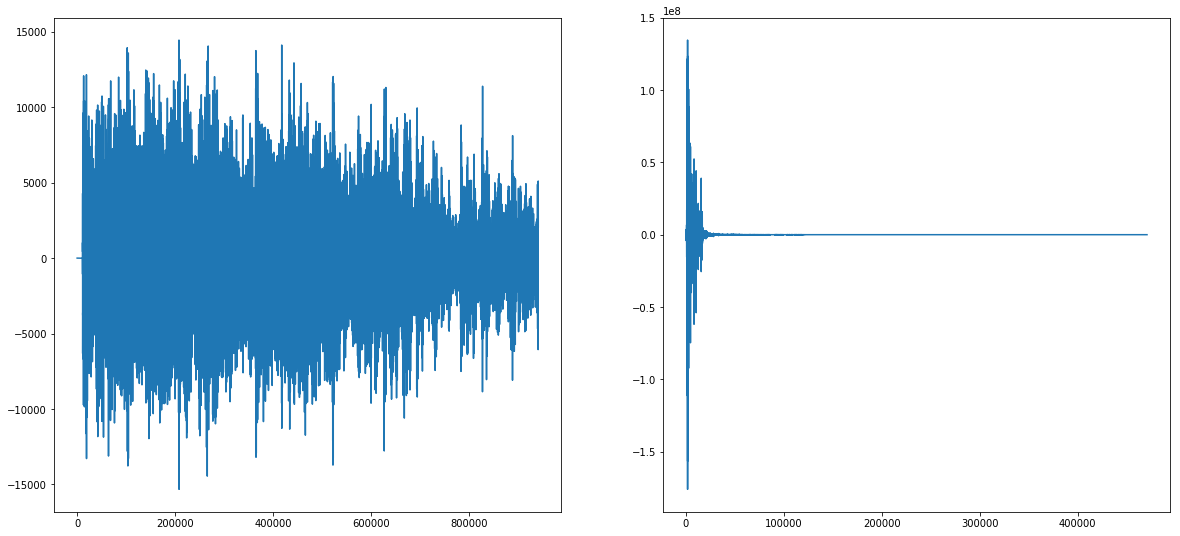

In [31]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.plot(sample_filtered_low)
plt.subplot(2,2,2)
plt.plot(y_ff_low[:len(y_ff_low)//2])
plt.show()

C:\Users\gonza\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


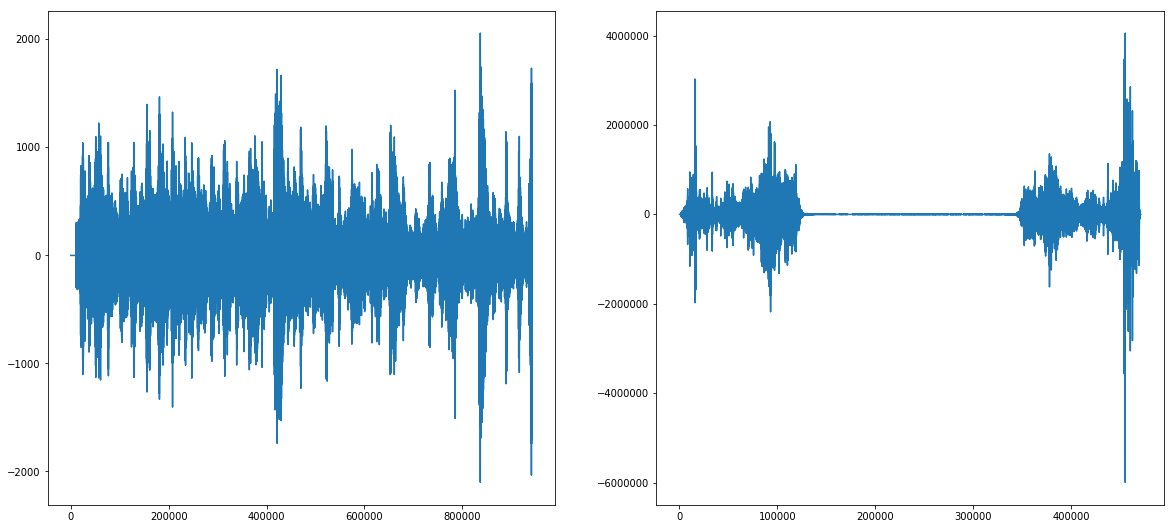

In [32]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.plot(sample_filtered_high)
plt.subplot(2,2,2)
plt.plot(y_ff_high[:len(y_ff_high)//2])
plt.show()